<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [2]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 

import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats

# Customer Analysis

In [4]:
np.sort(os.listdir())

array(['.config', '1_customers_dataset.csv',
       '1_order_payments_dataset.csv', '1_orders_dataset.csv',
       'KPMG_VI_New_raw_data_update_final.csv',
       'KPMG_VI_New_raw_data_update_final.xlsx',
       'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
       'WA_Fn-UseC_-Telco-Customer-Churn.csv', 'ab_experiment.csv',
       'app_wau.csv', 'bz_data_analyis.csv', 'cookie_cats.csv',
       'ecommerce-data.csv', 'groceries.csv', 'lead_conversion.csv',
       'mall_customers.csv', 'match_result_test.csv',
       'mock_sales_data.csv', 'online_retail.xlsx',
       'online_retail_II.xlsx', 'sales.csv', 'sales_data_with_stores.csv',
       'sales_vs_discount.csv', 'sample-sales-data.csv', 'sample_data',
       'scanner_data.csv', 'test.csv'], dtype='<U49')

In [5]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [6]:
cnt = pd.melt(df, id_vars = ['userid','version','sum_gamerounds'], var_name = 'retention', value_name = 'result')
cnt = cnt.groupby(['version','retention','result'])['userid'].count().reset_index().rename(columns = {'userid':'cnt'})
cnt = cnt[cnt['result'] == True]
cnt

,version,retention,result,cnt
1,gate_30,retention_1,True,20034
3,gate_30,retention_7,True,8502
5,gate_40,retention_1,True,20119
7,gate_40,retention_7,True,8279


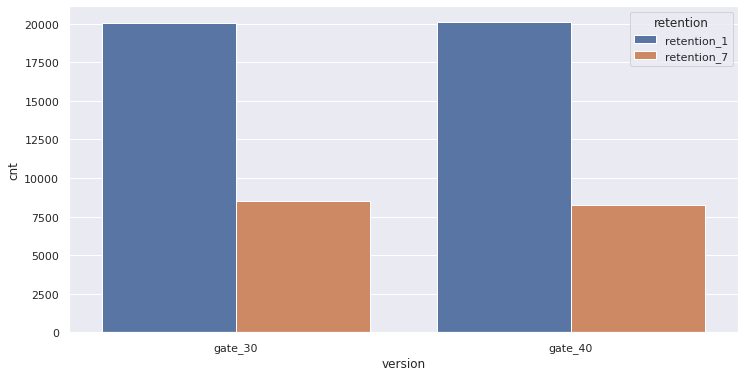

In [7]:
sns.set(rc = {'figure.figsize':[12,6]})
sns.barplot(data = cnt, x = 'version', y = 'cnt', hue = 'retention')
plt.show()

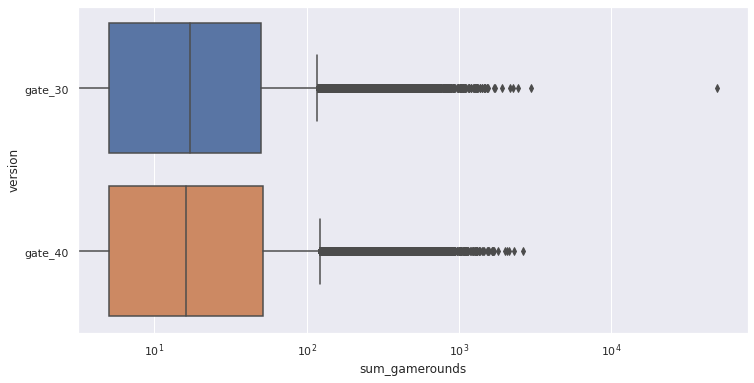

In [8]:
sns.set(rc = {'figure.figsize':[12,6]})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

In [9]:
df = df[df['sum_gamerounds'] <= 10000]

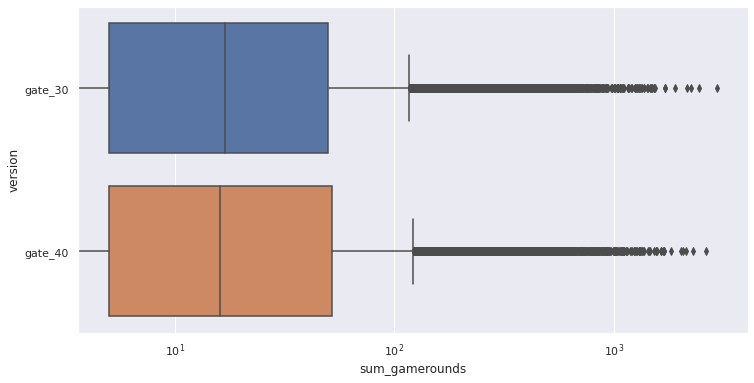

In [10]:
sns.set(rc = {'figure.figsize':[12,6]})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

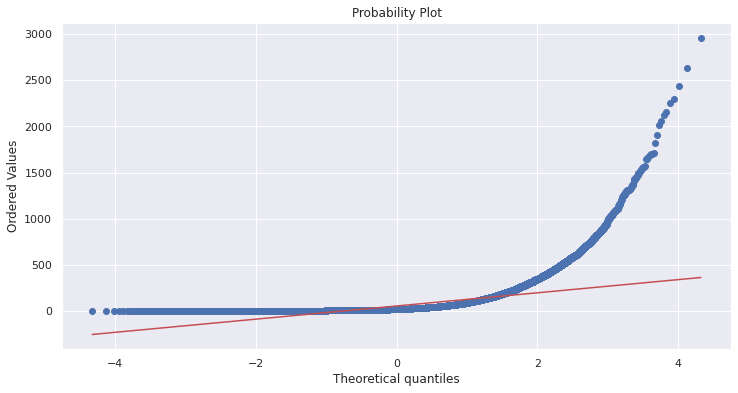

In [11]:
stats.probplot(df['sum_gamerounds'], dist = 'norm', plot = plt)
plt.show()

In [12]:
stats, p = stats.chisquare(df.sum_gamerounds)
print(str(stats),'\n', str(p))

18528909.99029161 
 0.0


In [13]:
n = 1000
boots = pd.DataFrame(
    [df.sample(frac = .1, replace = True).groupby(['version'])['sum_gamerounds'].mean() for i in range(n)]
)
boots.head()

version,gate_30,gate_40
sum_gamerounds,50.655293,49.581066
sum_gamerounds,51.851407,50.745175
sum_gamerounds,51.891509,50.899058
sum_gamerounds,50.309281,52.647658
sum_gamerounds,50.689522,51.033917


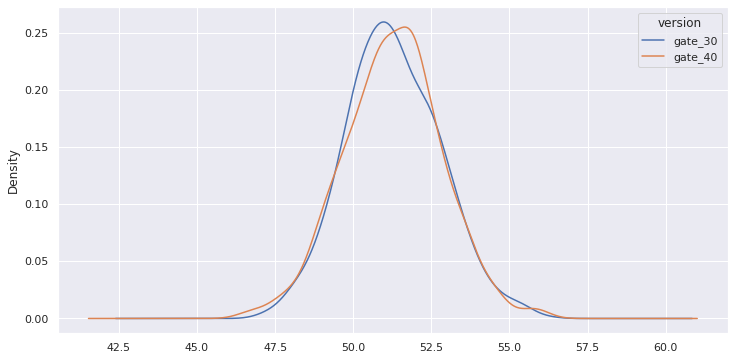

In [14]:
boots.plot.kde()

In [15]:
diff = boots['gate_30'] - boots['gate_40']
len(diff[diff > 0])/n

0.496

In [32]:
from scipy.stats import norm

alpha = .05
z_mean = np.mean(boots['gate_30']) - np.mean(boots['gate_40'])
z_sigma = np.sqrt(np.var(boots['gate_30'])/n + np.var(boots['gate_40'])/n)
ci = [z_mean - norm.ppf(1-alpha/2)*z_sigma, z_mean + norm.ppf(1-alpha/2)*z_sigma]

print(f'Z Mean of (30 - 40) : {z_mean}')
print(f'Z Sigma of (30 - 40): {z_sigma}')
print(f'CI of (30 - 40) : {ci}')

Z Mean of (30 - 40) : 0.011346501243835405
Z Sigma of (30 - 40): 0.06898145939597664
CI of (30 - 40) : [-0.1238546747732909, 0.1465476772609617]


In [33]:
ci = np.percentile(diff, [2.5, 97.5])
ci

array([-4.07762615,  4.00047199])

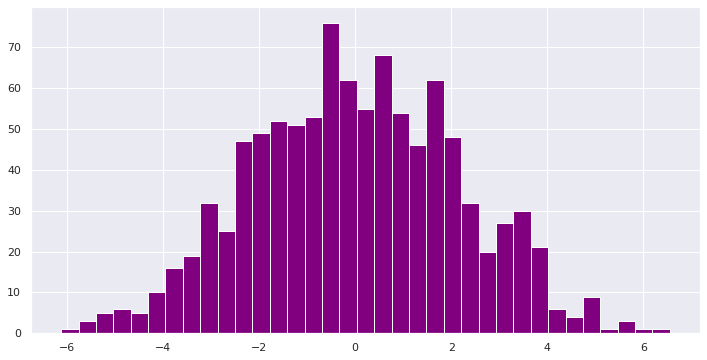

In [31]:
plt.hist(diff, bins = 35, color = 'purple')
plt.show()

# Iterators

In [34]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [35]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}